## Intro To CNN with Tensorflow

Practise of writing algorithms to discover visual patterns

### Get Data

Images are from food 101 but we modified it to just pizza and steak

In [1]:
import zipfile
    
#unzip the downloaded file
zip_ref = zipfile.ZipFile("D:\Sies Files\Sem3\Jupyter Workstation\Tensorflow\Cnn dataset\pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

### Inspect Data

A very crucial step at the begginning of the project is getting to know the data 

In [2]:
ls pizza_steak

 Volume in drive D is DATA
 Volume Serial Number is C829-0DBA

 Directory of D:\Sies Files\Sem3\Jupyter Workstation\Tensorflow\pizza_steak

19-Jul-22  02:29 PM    <DIR>          .
19-Jul-22  02:29 PM    <DIR>          ..
19-Jul-22  02:29 PM    <DIR>          test
19-Jul-22  02:29 PM    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  199,268,864,000 bytes free


In [3]:
ls pizza_steak\train

 Volume in drive D is DATA
 Volume Serial Number is C829-0DBA

 Directory of D:\Sies Files\Sem3\Jupyter Workstation\Tensorflow\pizza_steak\train

19-Jul-22  02:29 PM    <DIR>          .
19-Jul-22  02:29 PM    <DIR>          ..
19-Jul-22  02:29 PM    <DIR>          pizza
19-Jul-22  02:29 PM    <DIR>          steak
               0 File(s)              0 bytes
               4 Dir(s)  199,268,864,000 bytes free


In [4]:
ls pizza_steak\train\steak

 Volume in drive D is DATA
 Volume Serial Number is C829-0DBA

 Directory of D:\Sies Files\Sem3\Jupyter Workstation\Tensorflow\pizza_steak\train\steak

19-Jul-22  02:29 PM    <DIR>          .
19-Jul-22  02:29 PM    <DIR>          ..
20-Jul-22  12:12 PM            36,185 1000205.jpg
20-Jul-22  12:12 PM            34,497 100135.jpg
20-Jul-22  12:12 PM           116,802 101312.jpg
20-Jul-22  12:12 PM            56,754 1021458.jpg
20-Jul-22  12:12 PM            34,143 1032846.jpg
20-Jul-22  12:12 PM            24,688 10380.jpg
20-Jul-22  12:12 PM            37,134 1049459.jpg
20-Jul-22  12:12 PM            49,841 1053665.jpg
20-Jul-22  12:12 PM            59,983 1068516.jpg
20-Jul-22  12:12 PM            28,996 1068975.jpg
20-Jul-22  12:12 PM            29,525 1081258.jpg
20-Jul-22  12:12 PM            49,577 1090122.jpg
20-Jul-22  12:12 PM            59,976 1093966.jpg
20-Jul-22  12:12 PM            60,253 1098844.jpg
20-Jul-22  12:12 PM            69,843 1100074.jpg
20-Jul-22  12:12 PM  

In [5]:
import os

#walk through pizza steak directory and list the number of files in os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

20-Jul-22  12:12 PM            48,261 1925230.jpg
20-Jul-22  12:12 PM            49,320 1927984.jpg
20-Jul-22  12:12 PM            46,647 1930577.jpg
20-Jul-22  12:12 PM            58,150 1937872.jpg
20-Jul-22  12:12 PM            62,240 1941807.jpg
20-Jul-22  12:12 PM            69,736 1942333.jpg
20-Jul-22  12:12 PM            35,534 1945132.jpg
20-Jul-22  12:12 PM           110,964 1961025.jpg
20-Jul-22  12:12 PM            62,782 1966300.jpg
20-Jul-22  12:12 PM            66,107 1966967.jpg
20-Jul-22  12:12 PM            58,284 1969596.jpg
20-Jul-22  12:12 PM            68,232 1971757.jpg
20-Jul-22  12:12 PM            52,121 1976160.jpg
20-Jul-22  12:12 PM            54,650 1984271.jpg
20-Jul-22  12:12 PM            42,135 1987213.jpg
20-Jul-22  12:12 PM            33,399 1987639.jpg
20-Jul-22  12:12 PM            47,714 1995118.jpg
20-Jul-22  12:12 PM            35,115 1995252.jpg
20-Jul-22  12:12 PM            34,782 199754.jpg
20-Jul-22  12:12 PM            42,879 2002400.jpg
2

20-Jul-22  12:12 PM            31,616 3623556.jpg
20-Jul-22  12:12 PM            43,958 3640915.jpg
20-Jul-22  12:12 PM            58,474 3643951.jpg
20-Jul-22  12:12 PM            39,934 3653129.jpg
20-Jul-22  12:12 PM            63,436 3656752.jpg
20-Jul-22  12:12 PM            25,561 3663518.jpg
20-Jul-22  12:12 PM            39,503 3663800.jpg
20-Jul-22  12:12 PM            29,971 3664376.jpg
20-Jul-22  12:12 PM            53,730 3670607.jpg
20-Jul-22  12:12 PM            40,510 3671021.jpg
20-Jul-22  12:12 PM            52,099 3671877.jpg
20-Jul-22  12:12 PM            34,536 368073.jpg
20-Jul-22  12:12 PM            44,674 368162.jpg
20-Jul-22  12:12 PM            45,192 368170.jpg
20-Jul-22  12:12 PM            53,885 3693649.jpg
20-Jul-22  12:12 PM           123,523 3700079.jpg
20-Jul-22  12:12 PM            73,212 3704103.jpg
20-Jul-22  12:12 PM            62,334 3707493.jpg
20-Jul-22  12:12 PM            47,240 3716881.jpg
20-Jul-22  12:12 PM            62,267 3724677.jpg
20-

In [6]:
#how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train


20-Jul-22  12:12 PM            46,936 756655.jpg
20-Jul-22  12:12 PM            23,932 762210.jpg
20-Jul-22  12:12 PM            52,684 763690.jpg
20-Jul-22  12:12 PM            59,782 767442.jpg
20-Jul-22  12:12 PM            60,834 786409.jpg
20-Jul-22  12:12 PM            65,802 80215.jpg
20-Jul-22  12:12 PM            60,465 802348.jpg
20-Jul-22  12:12 PM            56,597 804684.jpg
20-Jul-22  12:12 PM            41,363 812163.jpg
20-Jul-22  12:12 PM            37,401 813486.jpg
20-Jul-22  12:12 PM            28,655 819027.jpg
20-Jul-22  12:12 PM            26,305 822550.jpg
20-Jul-22  12:12 PM            77,643 823766.jpg
20-Jul-22  12:12 PM            20,668 827764.jpg
20-Jul-22  12:12 PM            90,730 830007.jpg
20-Jul-22  12:12 PM            57,971 838344.jpg
20-Jul-22  12:12 PM            46,175 853327.jpg
20-Jul-22  12:12 PM            40,356 854150.jpg
20-Jul-22  12:12 PM            85,910 864997.jpg
20-Jul-22  12:12 PM            51,574 885571.jpg
20-Jul-22  12:12 PM 

750

##### To visualize, let's get class name programmatically

In [7]:
#get class names programmatically

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #create list of class name in subdirectory
print(class_names)

['pizza' 'steak']


### Let's Visualize our Images`

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    #set target directory
    target_folder = target_dir + target_class
    
    #get random image path
    random_image = random.sample(os.listdir(target_folder),1)
    
    #read image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    
    print(f"Image Shape:{img.shape}")#show the shape of the image
    
    return img

Image Shape:(512, 512, 3)


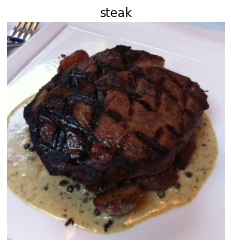

In [9]:
#view random image
img = view_random_image(target_dir = "pizza_steak/train/", 
                       target_class = "steak")

In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[209, 206, 227],
        [208, 205, 226],
        [207, 204, 225],
        ...,
        [159, 174, 197],
        [156, 171, 194],
        [153, 168, 191]],

       [[208, 205, 226],
        [206, 203, 224],
        [205, 202, 223],
        ...,
        [162, 177, 200],
        [160, 175, 198],
        [157, 172, 195]],

       [[205, 202, 223],
        [203, 200, 221],
        [202, 199, 220],
        ...,
        [166, 181, 204],
        [165, 180, 203],
        [163, 178, 201]],

       ...,

       [[214, 203, 217],
        [211, 200, 214],
        [206, 198, 211],
        ...,
        [217, 205, 217],
        [217, 205, 217],
        [217, 205, 217]],

       [[216, 205, 219],
        [213, 202, 216],
        [208, 200, 213],
        ...,
        [217, 205, 217],
        [218, 206, 218],
        [216, 204, 216]],

       [[208, 197, 211],
        [210, 199, 213],
        [211, 200, 214],
        ...,
        [217, 205, 21

In [11]:
#View Image Shape
img.shape #returns width, height, color channels

(512, 512, 3)

In [12]:
#Get all the pixel values between 0 and 1
img/255

array([[[0.81960784, 0.80784314, 0.89019608],
        [0.81568627, 0.80392157, 0.88627451],
        [0.81176471, 0.8       , 0.88235294],
        ...,
        [0.62352941, 0.68235294, 0.77254902],
        [0.61176471, 0.67058824, 0.76078431],
        [0.6       , 0.65882353, 0.74901961]],

       [[0.81568627, 0.80392157, 0.88627451],
        [0.80784314, 0.79607843, 0.87843137],
        [0.80392157, 0.79215686, 0.8745098 ],
        ...,
        [0.63529412, 0.69411765, 0.78431373],
        [0.62745098, 0.68627451, 0.77647059],
        [0.61568627, 0.6745098 , 0.76470588]],

       [[0.80392157, 0.79215686, 0.8745098 ],
        [0.79607843, 0.78431373, 0.86666667],
        [0.79215686, 0.78039216, 0.8627451 ],
        ...,
        [0.65098039, 0.70980392, 0.8       ],
        [0.64705882, 0.70588235, 0.79607843],
        [0.63921569, 0.69803922, 0.78823529]],

       ...,

       [[0.83921569, 0.79607843, 0.85098039],
        [0.82745098, 0.78431373, 0.83921569],
        [0.80784314, 0

### End to End example

Convolutional neural network to find patterns in our images

* Load our Images
* Preprocess our Images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
#set seed
tf.random.set_seed(42)

#preprocess data (get all pixel values between 0 and 1, normalization / scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

#Building a CNN Model
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding = "valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile CNN
model1.compile(loss="binary_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

#fit model
history1 = model1.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 58s 1s/step - loss: 0.5435 - accuracy: 0.7313 - val_loss: 0.4007 - val_accuracy: 0.8400
Epoch 2/5
47/47 [==============================] - 56s 1s/step - loss: 0.4155 - accuracy: 0.8213 - val_loss: 0.3297 - val_accuracy: 0.8720
Epoch 3/5
47/47 [==============================] - 62s 1s/step - loss: 0.3946 - accuracy: 0.8200 - val_loss: 0.3087 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 51s 1s/step - loss: 0.3507 - accuracy: 0.8513 - val_loss: 0.3044 - val_accuracy: 0.8920
Epoch 5/5
47/47 [==============================] - 54s 1s/step - loss: 0.3134 - accuracy: 0.8773 - val_loss: 0.2916 - val_accuracy: 0.8920
